### This code imports several Python libraries including datetime, numpy, pandas, seaborn, functools, io, requests, sklearn, and statsmodels. It then defines two variables, "today" and "year_ago", which represent the current date and the date exactly one year ago, respectively. The values of these variables are printed to the console using the "print" function.

### Overall, initialise the range of data we are going to get from

In [2]:
from datetime import datetime, timedelta
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import io
import requests
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt


today = datetime.now().strftime('%Y-%m-%d')
year_ago = (datetime.now() - 3*timedelta(days=365)).strftime('%Y-%m-%d')

print(today)
print(year_ago)


2023-03-31
2020-03-31


### This class is a utility for fetching historical stock price data from Yahoo Finance for a specific stock and time period, and returning the data as a Pandas DataFrame.

In [3]:
class YahooData:
    def fetch(ticker, start, end):
        headers = {
            'User-Agent': 'Chrome/51.0.2704.103 Safari/537.36'
        }

        url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
        x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
        y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
        url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"

        r = requests.get(url, headers=headers)
        data = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

        return data

This code snippet fetches historical stock data for two companies, Coca-Cola (KO) and PepsiCo (PEP), using the Yahoo Finance API. The data is fetched for the time period starting from three year ago to the current date.

For each company, the code selects only the "Date" and "Adj Close" columns from the fetched data and renames the "Adj Close" column to the company's ticker symbol. It then appends this data to a list called "dfs".

Next, the code uses the reduce() function from the functools module to merge the dataframes in the "dfs" list on the "Date" column. This creates a single table with the "Date" column and the "Adj Close" columns for both companies.

Finally, the code prints the shape of the resulting dataframe and displays the first few rows of the dataframe using the head() function.


In [4]:
dfs = []
tickers = ["KO","PEP"] 

for ticker in tickers:
    temp = YahooData.fetch(ticker, start=year_ago, end=today)
    temp['Date'] = temp.index
    temp.index = range(temp.shape[0])
    temp_new = temp[['Date', 'Adj Close']]
    temp_new.columns = ['Date', ticker]
    dfs.append(temp_new)
    
stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs) # create common table of stocks
print(stocks.shape)
stocks.head()

(757, 3)


,Date,KO,PEP
0,2020-03-30,41.013832,115.378090
1,2020-03-31,40.330269,110.431213
2,2020-04-01,38.388943,108.610619
3,2020-04-02,40.056835,113.888519
4,2020-04-03,39.947472,114.559738


These two lines of code create two new variables, PEP_LR and KO_LR, which are copies of the columns "PEP" and "KO" in the stocks dataframe. This is done to isolate the data for each company and make it easier to perform further analysis or modeling on each individual company's data separately.


In [5]:
PEP_LR = stocks['PEP'].copy()
KO_LR = stocks['KO'].copy()

In [6]:
PEP_LR.head()
KO_LR.head()

0    41.013832
1    40.330269
2    38.388943
3    40.056835
4    39.947472
Name: KO, dtype: float64

In [7]:

x= stocks['PEP']
y= stocks['KO']

In [8]:
print(type(x))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In this code snippet, the first two lines assign the columns 'PEP' and 'KO' of the stocks dataframe to the variables x and y, respectively.

The next two lines use the np.diff() function from the NumPy library to calculate the first differences of the 'PEP' and 'KO' columns, which represent the change in stock price from one day to the next. The [1:] slicing notation is used to remove the first row of the resulting arrays, since the first difference of the first row is undefined.

Finally, the code prints the shape of the KO_dff array, which represents the shape of the PEP_diff array as well, since they should have the same shape (i.e., one less row than the original 'PEP' and 'KO' columns, respectively).

In [9]:
KO_dff = np.diff(x)[1:]
PEP_diff = np.diff(y)[1:]
print(KO_dff.shape)

(755,)


This code defines a function called create_matrix that takes an input array x as its argument. The purpose of this function is to create a matrix that will be used for linear regression analysis.

The second line initializes a matrix matrix_X with dimensions (n-3, 3), where n-3 is the number of rows and 3 is the number of columns. The reason for subtracting 3 from n is that the linear regression model will be based on three consecutive values of the input array, so the first and last two values of x cannot be used.

The next few lines use a loop to fill in the values of matrix_X. The loop starts at index 2, since the first two rows of matrix_X cannot be filled in based on the available data. For each row i in matrix_X, the function assigns x[i-2], x[i-1], and x[i] to the first, second, and third columns of matrix_X, respectively. This creates a sliding window of three consecutive values of x that will be in three rows

In summary, the create_matrix function takes a list x as input and creates a 2-dimensional NumPy array matrix_X with n-3 rows and 3 columns, where n is the length of x. The first two rows of matrix_X are filled with ones, and the remaining rows are filled with elements from x, where each row corresponds to a sliding window of size 3 over x.


In [10]:
def create_matrix(x):
    n = len(x)
    matrix_X = np.ones((n-3, 3))
    for i in range(2, n-3):
        matrix_X[i, 0] = x[i-2] 
        matrix_X[i, 1] = x[i-1]
        matrix_X[i, 2] = x[i]
    return matrix_X

Based on the function call at the end (matrix_ko=create_matrix(KO_dff)), it seems that the input x is a NumPy array called KO_dff, and the resulting matrix is stored in a variable called matrix_ko.

In [11]:
matrix_ko=create_matrix(KO_dff)

Assuming that matrix_ko was created by calling the create_matrix function as shown in the previous question, the print(matrix_ko.shape) statement will output a tuple containing the dimensions of matrix_ko. Specifically, it will output the number of rows and columns of the matrix, respectively.


In [12]:
print(matrix_ko.shape)

(752, 3)


The line PEP_diff=PEP_diff[3:] appears to be slicing the PEP_diff array in order to remove its first three elements. because three x to predict the fourth y until the end.

In [13]:
PEP_diff=PEP_diff[3:]

In [14]:
print(matrix_ko.shape)
print(PEP_diff.shape)
print(PEP_diff.size)


(752, 3)
(752,)
752


The code computes the coefficients of a linear regression model that predicts the values of PEP_diff based on the values of a 3-column matrix matrix_ko.

The first line uses the NumPy np.linalg.inv() function to compute the inverse of the product of the transpose of matrix_ko and matrix_ko itself. This inverse matrix is then multiplied by the transpose of matrix_ko and PEP_diff using the @ operator. This multiplication results in a vector of coefficients that can be used to make predictions for PEP_diff given the values of matrix_ko.

The second line prints the resulting vector of coefficients, which represents the intercept and slopes of the linear regression model. The interpretation of these coefficients depends on the context of the problem and the units of measurement of the variables involved.

Overall, the code is performing a linear regression of PEP_diff on matrix_ko, which presumably represents some independent variables that are believed to be related to PEP_diff.

In [15]:
coeffs_ko_pep = np.linalg.inv(matrix_ko.T @ matrix_ko) @ matrix_ko.T @ PEP_diff
print(coeffs_ko_pep)

[ 0.01467133 -0.03199967 -0.00407475]


In [16]:
#double check the results are same from the library
coeffs_ko_pep2 = np.linalg.lstsq(matrix_ko, PEP_diff, rcond=None)[0]
print(coeffs_ko_pep2)

[ 0.01467133 -0.03199967 -0.00407475]


Based on the order of the elements in coeffs_ko_pep, it can be inferred that these variables correspond to the intercept and slopes of a linear regression model that predicts the values of a target variable (possibly PEP_diff) based on the values of three independent variables represented by the columns of a matrix matrix_ko.

In [17]:
alpha_ko_pep = coeffs_ko_pep[0]
beta_ko_pep = coeffs_ko_pep[1]
gamma_ko_pep = coeffs_ko_pep[2]

Calculating the spread between two stock prices changes according to the linear regression relationship between them.

spread_ko_pep = PEP_diff - (alpha_ko_pep + beta_ko_pep * KO_dff[:-3] ): This line calculates the spread between PEP_diff and a linear model fitted to KO_dff, using the estimated coefficients alpha_ko_pep and beta_ko_pep. The term KO_dff[:-3] selects all but the last three elements of KO_dff, which may be used to predict the next three values of PEP_diff. The resulting spread is then assigned to a variable spread_ko_pep.


In [18]:
spread_ko_pep = PEP_diff - (alpha_ko_pep + beta_ko_pep * KO_dff[:-3])

In [19]:
print(alpha_ko_pep)
print(beta_ko_pep)

0.014671334775055889
-0.03199966678272039


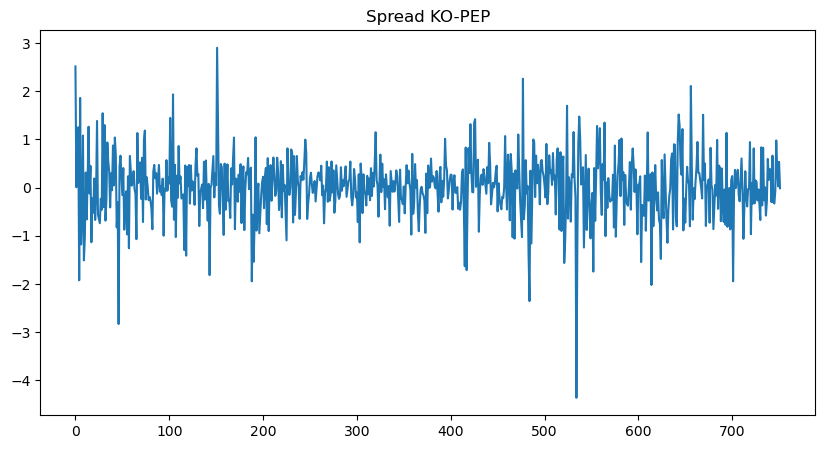

In [20]:
plot = plt.figure(figsize=(10, 5))
plt.plot(spread_ko_pep)
plt.title('Spread KO-PEP')
plt.show()

In [21]:
#print(spread_ko_pep)

This line of code calculates the cumulative sum of the array spread_ko_pep using the NumPy cumsum() function and assigns the result to a new variable spread_ko_pep_cum.

In the context of the previous code lines you provided, spread_ko_pep represents the difference between the actual value of Pepsico (PEP) and the predicted value based on a linear regression model with Coca-Cola (KO) stock prices as a predictor. The cumulative sum of these differences can be useful for tracking the total deviation of the model from the actual values over time. The resulting spread_ko_pep_cum variable will be an array of the same length as spread_ko_pep, where each element represents the cumulative sum of the corresponding elements of spread_ko_pep.




In [22]:
spread_ko_pep_cum = np.cumsum(spread_ko_pep)

In [23]:
def create_matrix(x):
    n = len(x)
    matrix_X = np.ones((n, 3))
    for i in range(2, n):
        matrix_X[i, 0] = x[i-2] 
        matrix_X[i, 1] = x[i-1]
        matrix_X[i, 2] = x[i]
    return matrix_X

These lines of code involve creating a matrix from the spread_ko_pep_cum array and checking its shape, then adjusting the arrays to ensure they have compatible sizes. 

matrix_cumsum=create_matrix(spread_ko_pep_cum): This line creates a matrix from the spread_ko_pep_cum array using a function called create_matrix(). The details of this function are not clear from the code provided, but it's likely that it reshapes the spread_ko_pep_cum array into a matrix of some specified dimensions. The resulting matrix is assigned to the variable matrix_cumsum.
print(matrix_cumsum[:-3].shape): This line prints the shape of the matrix matrix_cumsum, with the last three rows removed. The slicing operation [:-3] selects all but the last three rows of the matrix. This is likely done to ensure that the matrix has the same number of rows as the spread_ko_pep_cum array after the next line of code is executed.

print(spread_ko_pep_cum[3:].shape): This line prints the shape of the spread_ko_pep_cum array, with the first three elements removed. The slicing operation [3:] selects all elements of the array after the first three. This is likely done to ensure that the spread_ko_pep_cum array has the same number of elements as the matrix_cumsum matrix after the previous line of code is executed.


matrix_cumsum=matrix_cumsum[:-3] and spread_ko_pep_cum=spread_ko_pep_cum[3:]: These lines adjust the matrix_cumsum and spread_ko_pep_cum variables to ensure they have compatible sizes for further analysis or modeling. The first line removes the last three rows from matrix_cumsum, while the second line removes the first three elements from spread_ko_pep_cum. These adjustments are based on the assumption that the first three elements of spread_ko_pep_cum were used to predict the next three elements, and thus should not be included in the analysis. The resulting matrix_cumsum and spread_ko_pep_cum variables will have the same length and number of rows, and can be used together in further calculations or modeling.


In [24]:
matrix_cumsum=create_matrix(spread_ko_pep_cum)

In [25]:
#check size between matrix and spread
print(matrix_cumsum[:-3].shape)
print(spread_ko_pep_cum[3:].shape)
matrix_cumsum=matrix_cumsum[:-3]
spread_ko_pep_cum=spread_ko_pep_cum[3:]

(749, 3)
(749,)


In [26]:
spread_coeffs=np.linalg.inv(matrix_cumsum.T @ matrix_cumsum) @ matrix_cumsum.T @ spread_ko_pep_cum



In [27]:
mean = spread_coeffs[0]/ (1 - spread_coeffs[1])

In [28]:
print(spread_coeffs)

[ 0.08284871 -0.05343675  0.96826536]


In [29]:
print(mean)

0.07864612060735247


#### Cumsum of spread demonstrated the accumulated change of stock price between cocacola and pepsi, however the stock price of those two companies attend to return due to their mean reversion relationship

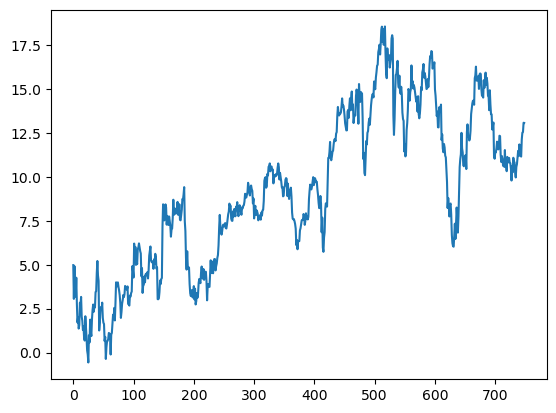

In [30]:
plt.plot(spread_ko_pep_cum)
plt.show()

This code computes the statistics of the spread between KO and PEP stocks using the spread coefficients and cumulative values. It then calculates the mean, standard deviation, upper and lower thresholds for the spread, and plots the spread along with the computed statistics.

The first line extracts the spread coefficients, where spread_coeffs[0] is the intercept and spread_coeffs[1] is the slope. The second line calculates the spread values z using the formula z = spread_coeffs[0] + spread_coeffs[1] * spread_ko_pep_cum, where spread_ko_pep_cum is the cumulative spread values between KO and PEP stocks. The third and fourth lines compute the mean and standard deviation of the spread values z using the NumPy library's np.std() and np.mean() functions, respectively.

The fifth and sixth lines compute the upper and lower thresholds for the spread, which are defined as 5 standard deviations away from the mean. The seventh line creates a plot using Matplotlib to visualize the spread values spread_ko_pep and the computed statistics. The plt.axhline() functions draw horizontal lines at the mean, upper, and lower thresholds, respectively. The title of the plot is "KO vs. PEP z spread and trading signals."

Overall, this code computes and visualizes the statistics of the spread between KO and PEP stocks, which can be used to inform trading decisions.

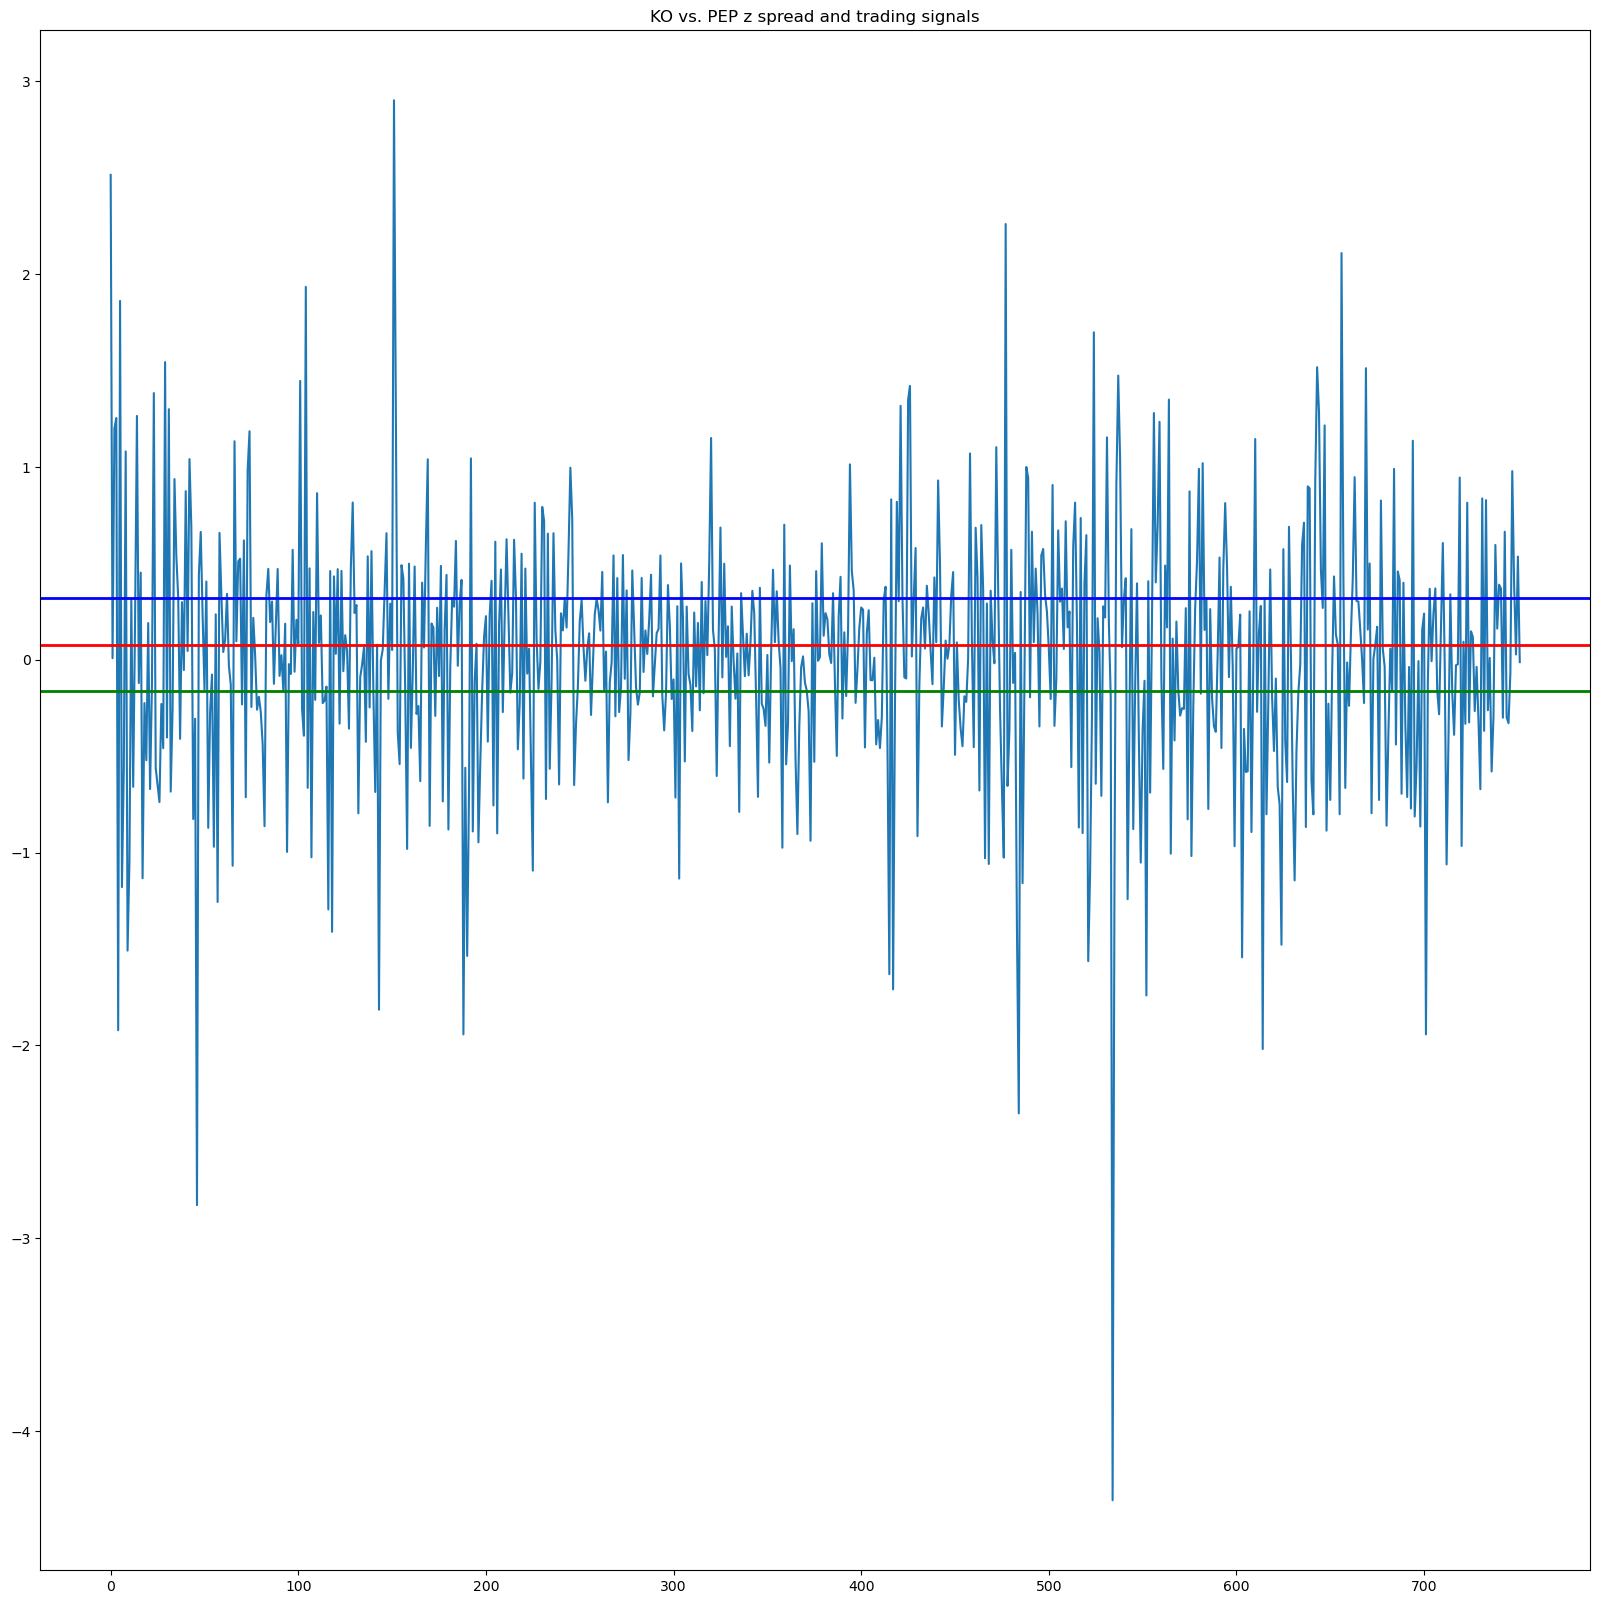

In [31]:
# Compute statistics of the spread
z = spread_coeffs[0]  + spread_coeffs[1] * spread_ko_pep_cum
meanT = mean
sdT = np.std(z)
upperThr = meanT +  sdT
lowerThr = meanT -  sdT

# Visualize the in-sample spread + stats
plot = plt.figure(figsize=(20, 20))
plt.plot(spread_ko_pep)
plt.axhline(y=meanT, color='red', linestyle='-', linewidth=2)
plt.axhline(y=upperThr, color='blue', linestyle='-', linewidth=2)
plt.axhline(y=lowerThr, color='green', linestyle='-', linewidth=2)
plt.title("KO vs. PEP z spread and trading signals")
plt.show()

In [32]:
spread_type = spread_ko_pep.copy()
spread_type = pd.Series(spread_type)
spread_type.reset_index(drop=True, inplace=True)

ratios_mavg5 = spread_type.rolling(window=5, center=False).mean()
ratios_mavg20 = spread_type.rolling(window=20, center=False).mean()

std_20 = spread_type.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

ratios_mavg5 = spread_type.rolling(window=5, center=False).mean()
ratios_mavg60 = spread_type.rolling(window=60, center=False).mean()
std_60 = spread_type.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

In [33]:
print(zscore_60_5)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
747    0.450758
748    0.321938
749    0.452174
750    0.732072
751    0.739865
Length: 752, dtype: float64


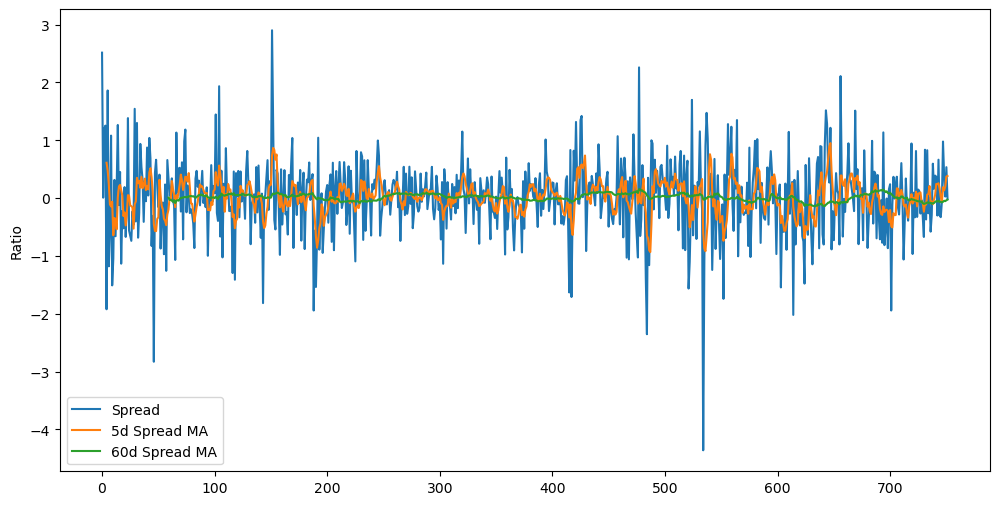

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(spread_type.index, spread_type.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Spread', '5d Spread MA', '60d Spread MA'])

plt.ylabel('Ratio')
plt.show()

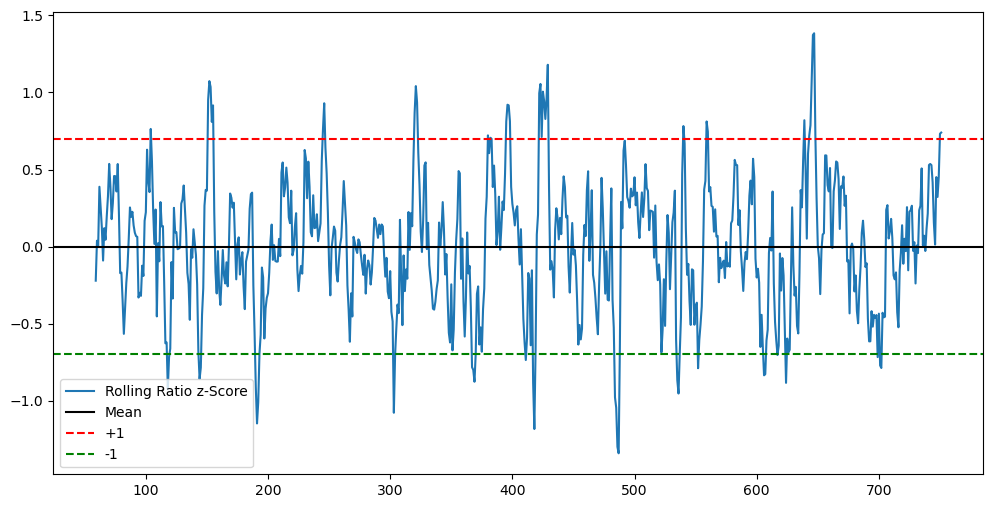

In [35]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(0.7, color='red', linestyle='--')
plt.axhline(-0.7, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

In [36]:
print(sdT)
print(mean)


0.2401615640828436
0.07864612060735247


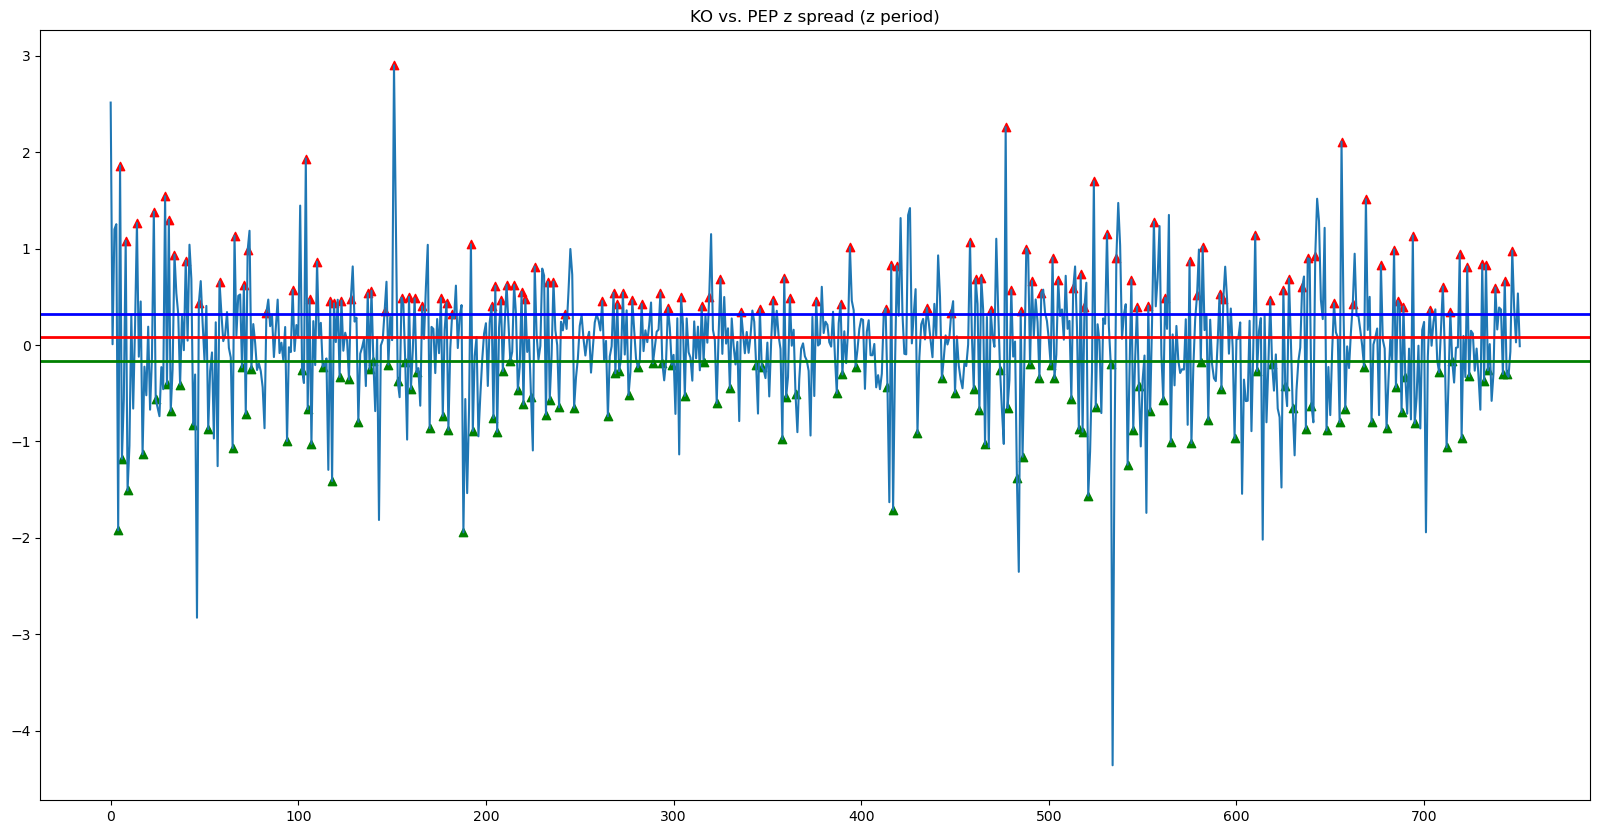

In [37]:
# Compute statistics of the spread
#meanT = np.mean(spread_ko_pep)
#sdT = np.std(spread_ko_pep)
meanT=mean
sdT = np.std(z)
upperThr = meanT + sdT
lowerThr = meanT - sdT

# Initialize variables
current_position = 'sell'
buy_idx_p = []
sell_idx_p = []

# Loop over each observation
for i in range(len(spread_ko_pep)):
    
    # Check if we should buy or sell
    # when the spread is above the upper threshold
    if current_position == 'sell' and spread_ko_pep[i] < lowerThr:
        current_position = 'buy'
        buy_idx_p.append(i)
    
    # Check if we should sell
    elif current_position == 'buy' and spread_ko_pep[i] > upperThr:
        current_position = 'sell'
        sell_idx_p.append(i)
    
    # Otherwise, hold our current position
    else:
        pass

# Plot the spread with buy and sell signals
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(spread_ko_pep)
ax.axhline(y=meanT, color='red', linestyle='-', linewidth=2)
ax.axhline(y=upperThr, color='blue', linestyle='-', linewidth=2)
ax.axhline(y=lowerThr, color='green', linestyle='-', linewidth=2)
ax.scatter(buy_idx_p, spread_ko_pep[buy_idx_p], color='g', marker='^')
ax.scatter(sell_idx_p, spread_ko_pep[sell_idx_p], color='r', marker='^')
ax.title.set_text("KO vs. PEP z spread (z period)")

# Show the plot
plt.show()

1 enter the trade when upper thread or lower thread 

2 close the order at the mean of the wave 

3 calcuate profit based on the stock price of the mean and deduct the opened orders 

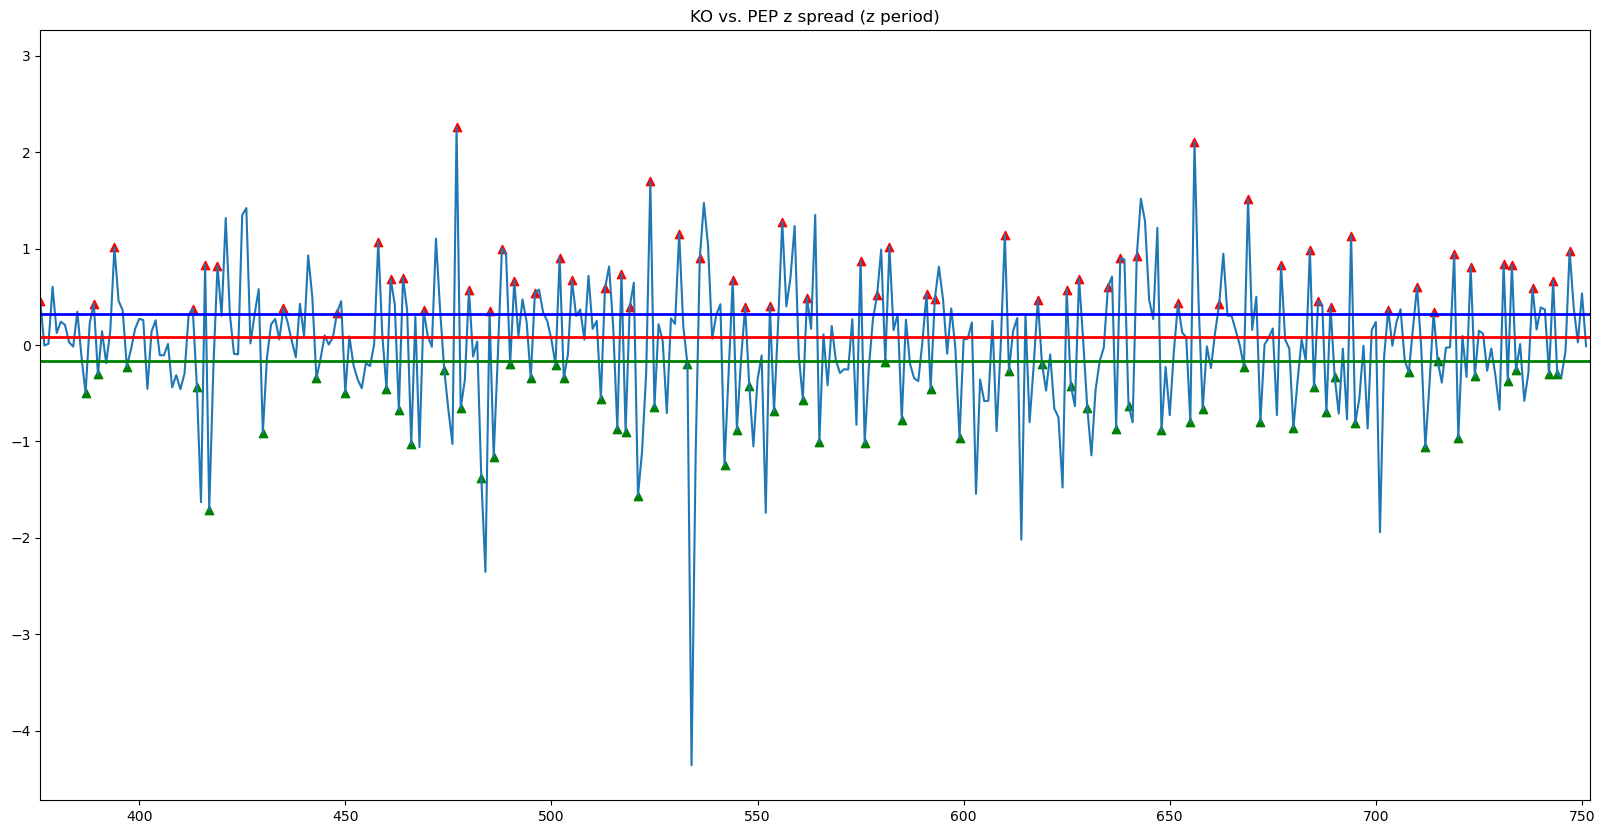

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(spread_ko_pep)
ax.axhline(y=meanT, color='red', linestyle='-', linewidth=2)
ax.axhline(y=upperThr, color='blue', linestyle='-', linewidth=2)
ax.axhline(y=lowerThr, color='green', linestyle='-', linewidth=2)
ax.scatter(buy_idx_p, spread_ko_pep[buy_idx_p], color='g', marker='^')
ax.scatter(sell_idx_p, spread_ko_pep[sell_idx_p], color='r', marker='^')
ax.title.set_text("KO vs. PEP z spread (z period)")

# Set x-axis limits to show only half of the graph
ax.set_xlim([len(spread_ko_pep)//2, len(spread_ko_pep)])

# Show the plot
plt.show()


In [39]:
print(sdT)

0.2401615640828436


In [40]:
score_t = (spread_ko_pep[-1] - meanT) / sdT
print(score_t)

-0.3769141869891068


#### According to the formular of spread, spread= Pep(diff) - (alpha + beta* Ko(diff)) 

#### the spread is higher than 1 because stock price of Pep increase only, or price of Pep increase and Ko drop, or only stock price of KO drop , or all happening in the same time.

#### the spread is lower than 1 because Pep decrease or KO increase only, or price of KO increase and Pep drop , or only stock price of Pep drop, or all happening in the same time.

In [41]:
# Calculate the profits
Pep= stocks['PEP']
ko= stocks['KO']
pd.DataFrame(Pep)
pd.DataFrame(ko)


,KO
0,41.013832
1,40.330269
2,38.388943
3,40.056835
4,39.947472
...,...
752,60.900002
753,61.349998
754,61.419998
755,61.860001


In [42]:
# def spread_trade(stock1, stock2, Num_std, close_ratio):
#     # Compute the spread between the two stocks 
#     alpha = 0.018853029158009755
#     beta = -0.03766977298360063
#     # Compute the rolling mean and rolling standard deviation of the spread
#     spread_mean = 0.06281967480950455
#     #spread_std = np.std(z)
#     spread_std = 0.6412549723116879

#     stock1_dff = np.diff(stock1)[1:]
#     stock2_diff = np.diff(stock2)[1:]
#     #spread_ko_pep = PEP_diff - (alpha_ko_pep + beta_ko_pep * KO_dff[:-3])
#     spread = stock2_diff - (alpha + beta * stock1_dff)

#     upper_band = spread_mean + Num_std * spread_std
#     lower_band = spread_mean - Num_std * spread_std
    
#     #Compute the profits from the trades
#     profits = []
#     ratio = stock1 / stock2
#     # Simulate trading 
#     current_position = 'None'
#     profit_buy=0
#     profit_sell=0
#     buy_idx = []
#     sell_idx = []
#     close_idx_buy = []
#     close_idx_sell = []
#     stock1_buy_price=0
#     stock2_shot_price=0
#     stock1_shot_price=0
#     stock2_buy_price=0

#     # Loop over each observation
#     for i in range(len(spread)):
#         # Check if we should buy or sell
#         if current_position == 'None' and spread[i] < lower_band:
#             current_position = 'buy'
#             buy_idx.append(i)
#             #second method to calculate the profit
#             stock1_shot_price=stock1[i]
#             stock2_buy_price=stock2[i]

#         elif current_position == 'None' and spread[i] > upper_band:
#             current_position = 'sell'
#             sell_idx.append(i)

#             #second method to calculate the profit
#             stock1_buy_price=stock1[i]
#             stock2_shot_price=stock2[i]

#         # Clear positions if the z-score between -.5 and .5
#         elif abs(spread[i]) < close_ratio:
#             if current_position == 'buy':
#                 close_idx_buy.append(i)
#                 #short the stock2 and buy the stock1
#                 profit_buy = stock2[i] -stock2_buy_price + stock1_shot_price- stock1[i]

#                 stock2_shot_price=0
#                 stock1_buy_price=0
#                 profits.append(profit_buy)
#                 profit_buy=0

#             elif current_position == 'sell':
#                 close_idx_sell.append(i)
#                 #buy the stock 2 and sell the stock1
#                 profit_sell =  stock2_shot_price - stock2[i] + stock1[i] - stock1_buy_price 

#                 stock2_shot_price=0
#                 stock1_buy_price=0
#                 profits.append(profit_sell)
#                 #print(profit_sell)
#                 profit_sell=0
#             current_position = 'None'
            
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.plot(spread)
#     ax.axhline(y=spread_mean, color='red', linestyle='-', linewidth=2)
#     ax.axhline(y=upper_band, color='blue', linestyle='-', linewidth=2)
#     ax.axhline(y=lower_band, color='green', linestyle='-', linewidth=2)
#     ax.scatter(buy_idx, spread[buy_idx], color='g', marker='^')
#     ax.scatter(sell_idx, spread[sell_idx], color='r', marker='^')
#     ax.title.set_text("stock1 vs. stock2 spread")
#     # Show the plot
#     plt.show()
#     # Return the total profit
#     return profits
    

In [43]:
def spread_trade(stock1, stock2, Num_std, close_ratio):
    # Compute the spread between the two stocks 
    alpha = 0.018853029158009755
    beta = -0.03766977298360063

    stock1_dff = np.diff(stock1)[1:]
    stock2_diff = np.diff(stock2)[1:]
    #spread_ko_pep = PEP_diff - (alpha_ko_pep + beta_ko_pep * KO_dff[:-3])
    spread = stock2_diff - (alpha + beta * stock1_dff)
    # Compute the rolling mean and rolling standard deviation of the spread
    spread_mean = 0.07236566697885743
    #spread_std = np.std(z)
    spread_std = 0.20111729716143434



    upper_band = spread_mean + Num_std * spread_std
    lower_band = spread_mean - Num_std * spread_std
    
    #Compute the profits from the trades
    profits = []
    ratio = stock1 / stock2
    # Compute the z-score of the spread    
    # Simulate trading 
    current_position = 'None'
    profit_buy=0
    profit_sell=0
    buy_idx = []
    sell_idx = []
    close_idx_buy = []
    close_idx_sell = []
    stock1_buy_price=0
    stock2_shot_price=0
    stock1_shot_price=0
    stock2_buy_price=0

    # Loop over each observation
    for i in range(len(spread)):
        # Check if we should buy or sell
        if current_position == 'None' and spread[i] < lower_band:
            current_position = 'buy'
            buy_idx.append(i)

            #second method to calculate the profit
            stock1_buy_price=stock1[i]
            stock2_shot_price=stock2[i]

            # first method to calculate the profit
            # stock1_shot_price=stock1[i]
            # stock2_buy_price=stock2[i]
            #stock2_buy_price=stock2[i]*ratio[i]
            #print(stock2_buy_price)
            #print(stock1_shot_price)

        elif current_position == 'None' and spread[i] > upper_band:
            current_position = 'sell'
            sell_idx.append(i)

            #second method to calculate the profit
            stock1_shot_price=stock1[i]
            stock2_buy_price=stock2[i]

            # stock1_buy_price=stock1[i]
            # stock2_shot_price=stock2[i]
            #stock2_shot_price=stock2[i]*ratio[i]
            #print(stock2_shot_price)
            #print(stock1_buy_price)

        # Clear positions if the z-score between -.5 and .5
        elif abs(spread[i]) < close_ratio:
            if current_position == 'buy':
                close_idx_buy.append(i)
                #profit_buy= stock2[i]*ratio[i] - stock2_buy_price + stock1_shot_price - stock1[i]
                #first way to calcualte profit 
                # profit_buy = stock2[i] - stock2_buy_price + stock1_shot_price - stock1[i]

                #second way to calculate profit
                profit_buy = stock1[i] - stock1_buy_price +stock2_shot_price -stock2[i]
#                stock2_buy_price -stock2[i]  + stock1[i]- stock1_shot_price

                stock2_buy_price=0
                stock1_shot_price=0
                profits.append(profit_buy)
                #print(profit_buy)
                profit_buy=0

            elif current_position == 'sell':
                close_idx_sell.append(i)
                #profit_sell= stock2_shot_price - stock2[i]*ratio[i] + stock1[i] - stock1_buy_price

                #first way to calcualte profit 
                # profit_sell = stock2_shot_price - stock2[i] + stock1[i] - stock1_buy_price

                #second way to calculate profit
                profit_sell = stock1_shot_price - stock1[i] + stock2[i] - stock2_buy_price

                stock2_shot_price=0
                stock1_buy_price=0
                profits.append(profit_sell)
                #print(profit_sell)
                profit_sell=0
            current_position = 'None'
            
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(spread)
    ax.axhline(y=spread_mean, color='red', linestyle='-', linewidth=2)
    ax.axhline(y=upper_band, color='blue', linestyle='-', linewidth=2)
    ax.axhline(y=lower_band, color='green', linestyle='-', linewidth=2)
    ax.scatter(buy_idx, spread[buy_idx], color='g', marker='^')
    ax.scatter(sell_idx, spread[sell_idx], color='r', marker='^')
    ax.title.set_text("stock1 vs. stock2 spread")
    # Show the plot
    plt.show()
    # Return the total profit
    return profits
    

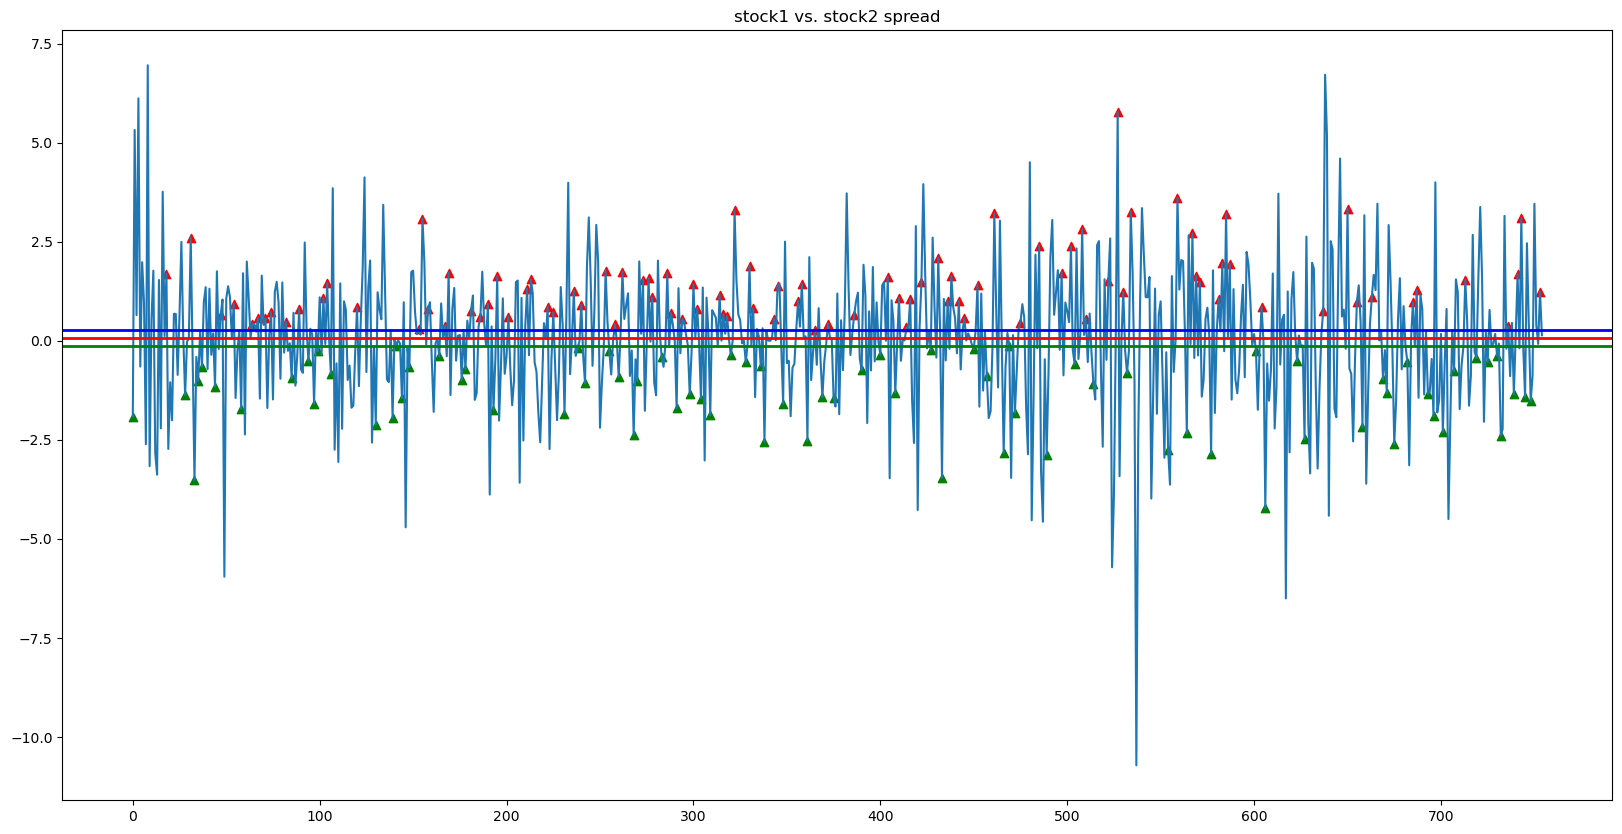

In [44]:
lastprofit = spread_trade(ko,Pep,1,0.5)

In [45]:
print(lastprofit)

[-4.331385999999995, -1.8272929999999974, -0.6574430000000149, 0.32905200000000434, 1.9538960000000003, 1.6625659999999982, 0.14412199999999586, 1.8918919999999986, 0.3433029999999917, 0.8262399999999985, -1.2970049999999986, -0.0360859999999974, 0.6673169999999828, 0.32007200000001035, 0.2739569999999958, 0.007168000000007169, -0.7158129999999971, -1.7000549999999919, -0.32397799999999677, 0.017069999999975494, -0.0920019999999937, -0.25984899999998845, -0.12923699999996074, 6.396449000000004, 9.885096999999988, -3.4578670000000216, -0.24291999999999803, 0.5560799999999801, -0.26584600000001046, -1.3898200000000003, -0.07300100000000498, -1.0827549999999917, 1.157909999999987, -0.13723700000002736, 0.39018200000001, 0.6786430000000223, -0.019625999999988153, 0.6191940000000216, 1.5545610000000067, 0.34213600000001065, 0.1637309999999843, -0.946109000000007, 0.01679699999996842, -2.3408660000000054, 0.07701000000000136, -4.4573019999999985, 0.463325999999995, -2.0740659999999878, -2.43

Number of trades:  173
Number of profitable trades:  100
Number of unprofitable trades:  73
Percentage of profitable trades:  0.5780346820809249
Percentage of unprofitable trades:  0.42196531791907516
Cumulative profit:  75.4063840000002
Annualized mean return:  109.84051310982689
Annualized standard deviation of return:  32.975649913125665
Annualized sharpe ratio:  3.33095824947201
Max drawdown:  12.07042199999998


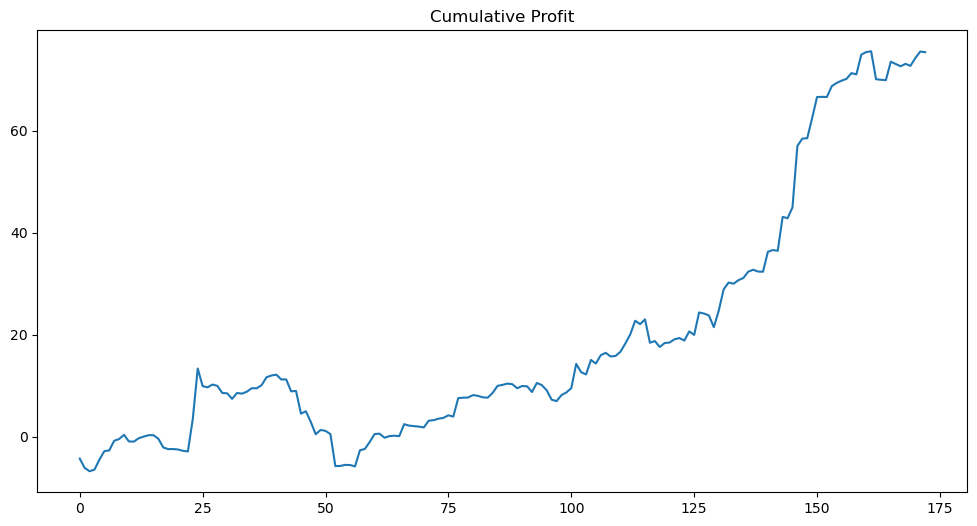

In [46]:
#print(lastprofit)
# number of trades 
print("Number of trades: ", len(lastprofit))
#profitable trades 
print("Number of profitable trades: ", len([p for p in lastprofit if p > 0]))
#unprofitable trades
print("Number of unprofitable trades: ", len([p for p in lastprofit if p < 0]))
#profitable trades percentage
print("Percentage of profitable trades: ", len([p for p in lastprofit if p > 0]) / len(lastprofit))
#unprofitable trades percentage
print("Percentage of unprofitable trades: ", len([p for p in lastprofit if p < 0]) / len(lastprofit))
#cumulative profit[PnL] 
print("Cumulative profit: ", sum(lastprofit))
#annualized mean return 
print("Annualized mean return: ", np.mean(lastprofit) * 252)
#annualized standard deviation of return
print("Annualized standard deviation of return: ", np.std(lastprofit) * np.sqrt(252))
#annualized sharpe ratio
print("Annualized sharpe ratio: ", np.mean(lastprofit) / np.std(lastprofit) * np.sqrt(252))
#max drawdown
print("Max drawdown: ", max(lastprofit))
#Plot the cumulative profit
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(lastprofit))
plt.title("Cumulative Profit")
plt.show()


In [47]:
# Calculate the sum of lastprofit
lastprofit = sum(lastprofit)
print(lastprofit)
#profits = lastprofit

75.4063840000002


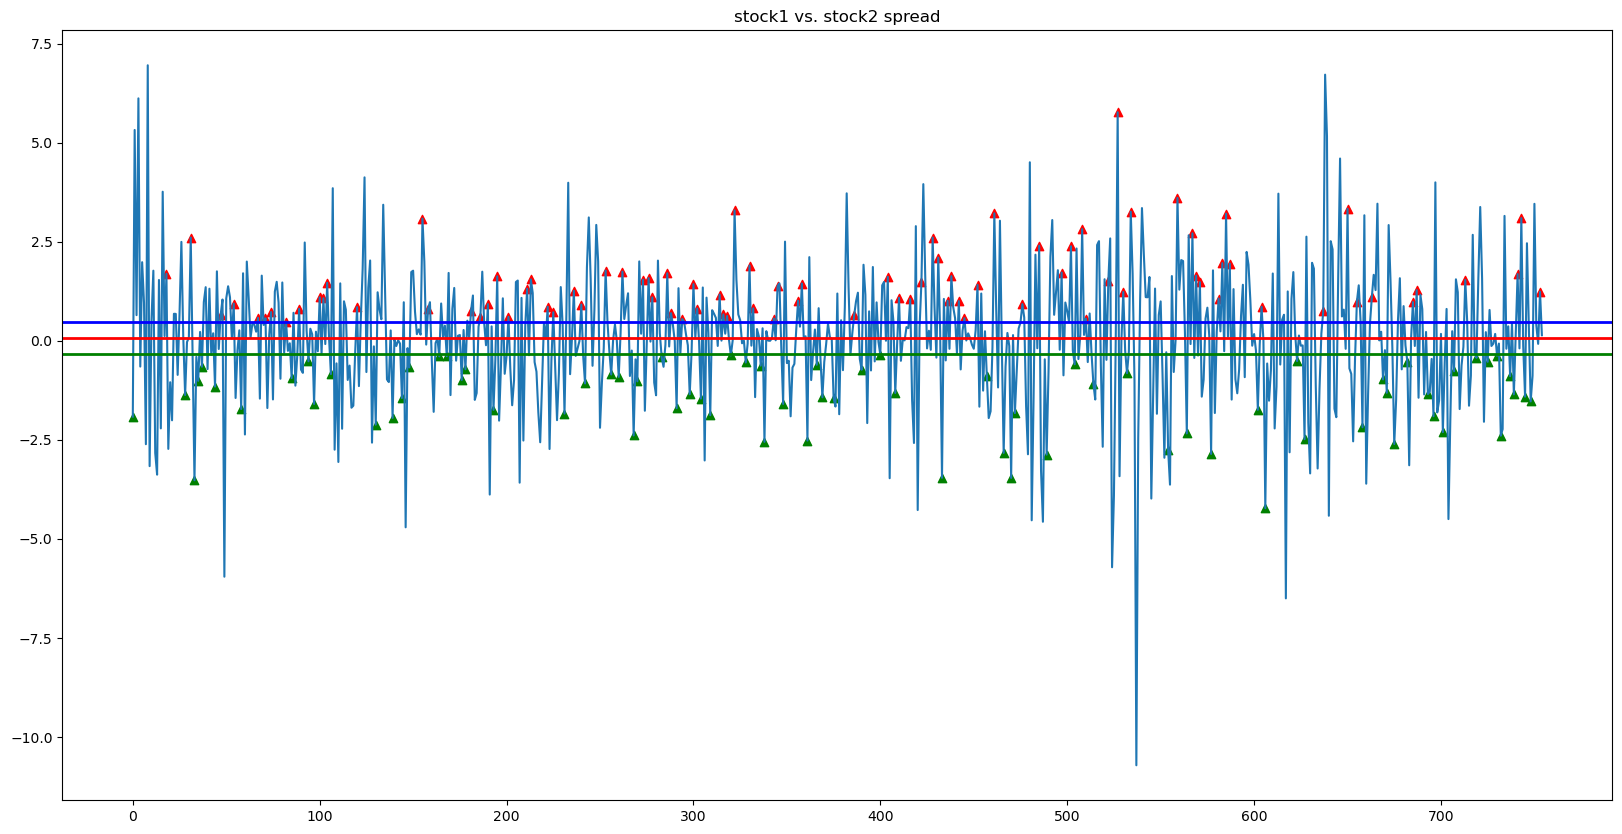

In [48]:
second=spread_trade(ko,Pep, 2, 0.5)
lastprofit=second

Number of trades:  164
Number of profitable trades:  98
Number of unprofitable trades:  66
Percentage of profitable trades:  0.5975609756097561
Percentage of unprofitable trades:  0.4024390243902439
Cumulative profit:  76.93822900000015
Annualized mean return:  118.22215675609779
Annualized standard deviation of return:  33.85640236518008
Annualized sharpe ratio:  3.491870030398872
Max drawdown:  12.07042199999998


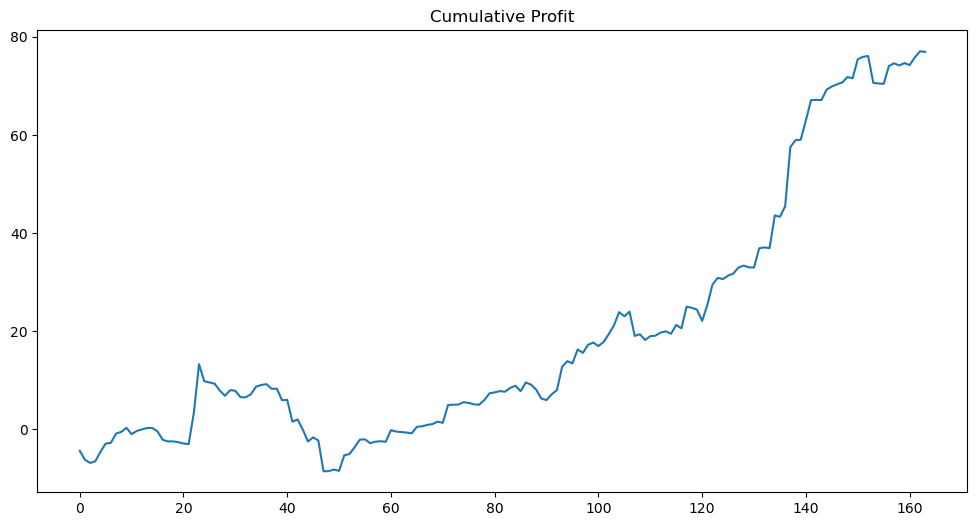

In [49]:
#print(lastprofit)
# number of trades 
print("Number of trades: ", len(lastprofit))
#profitable trades 
print("Number of profitable trades: ", len([p for p in lastprofit if p > 0]))
#unprofitable trades
print("Number of unprofitable trades: ", len([p for p in lastprofit if p < 0]))
#profitable trades percentage
print("Percentage of profitable trades: ", len([p for p in lastprofit if p > 0]) / len(lastprofit))
#unprofitable trades percentage
print("Percentage of unprofitable trades: ", len([p for p in lastprofit if p < 0]) / len(lastprofit))
#cumulative profit[PnL] 
print("Cumulative profit: ", sum(lastprofit))
#annualized mean return 
print("Annualized mean return: ", np.mean(lastprofit) * 252)
#annualized standard deviation of return
print("Annualized standard deviation of return: ", np.std(lastprofit) * np.sqrt(252))
#annualized sharpe ratio
print("Annualized sharpe ratio: ", np.mean(lastprofit) / np.std(lastprofit) * np.sqrt(252))
#max drawdown
print("Max drawdown: ", max(lastprofit))
#Plot the cumulative profit
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(lastprofit))
plt.title("Cumulative Profit")
plt.show()


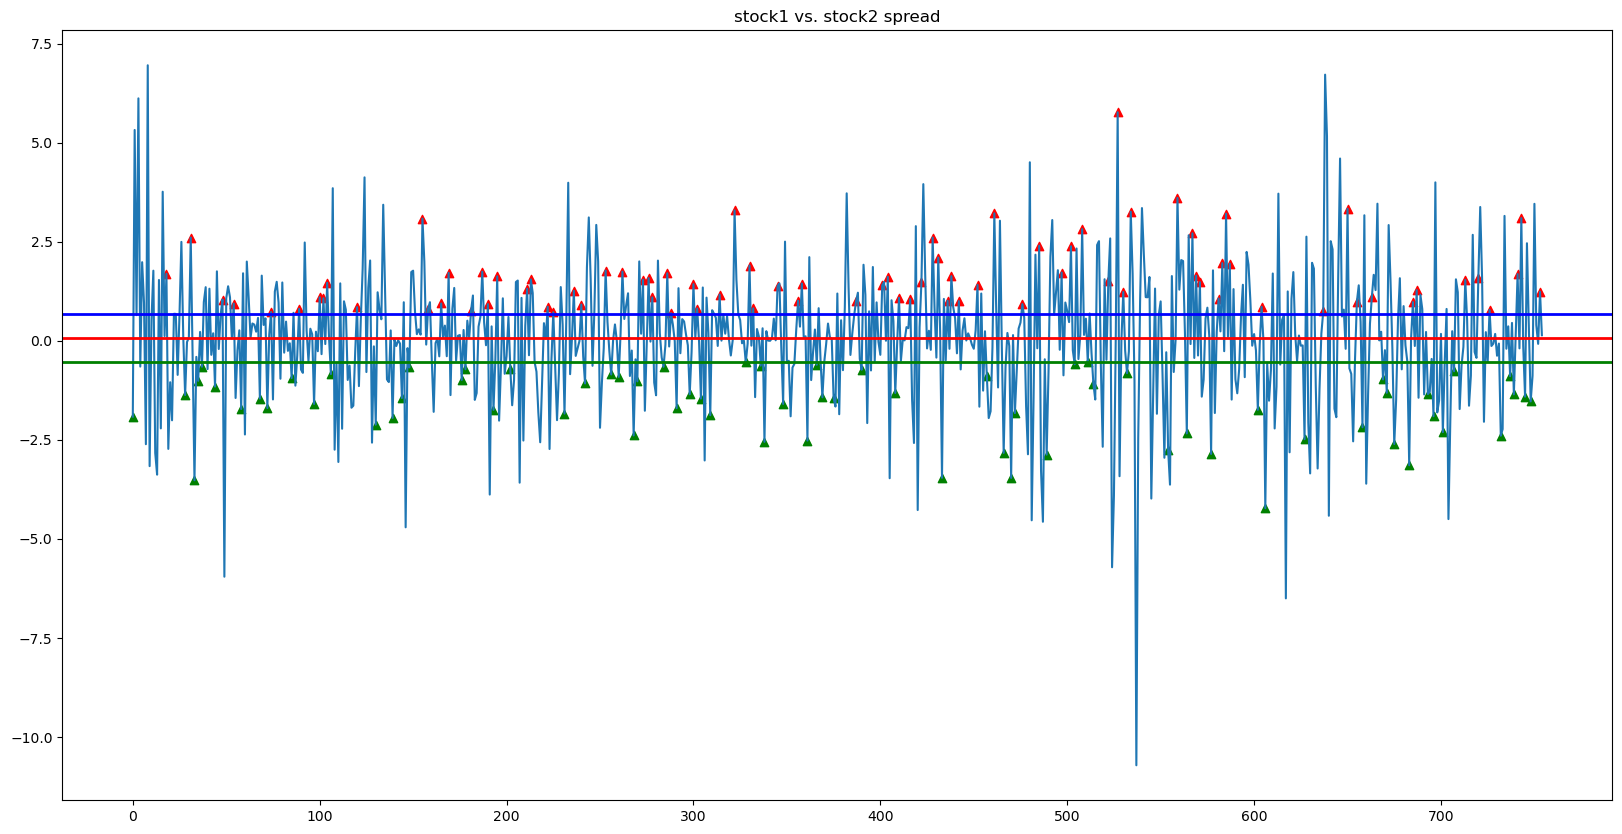

In [50]:
third_trade=spread_trade(ko,Pep, 3, 0.5)

###  Economic Performance Results :

Number of trades:  154
Number of profitable trades:  99
Number of unprofitable trades:  55
Percentage of profitable trades:  0.6428571428571429
Percentage of unprofitable trades:  0.35714285714285715
Cumulative profit:  98.33598800000024
Annualized mean return:  160.9134349090913
Annualized standard deviation of return:  34.34232844819004
Annualized sharpe ratio:  4.685571485109129
Max drawdown:  12.07042199999998


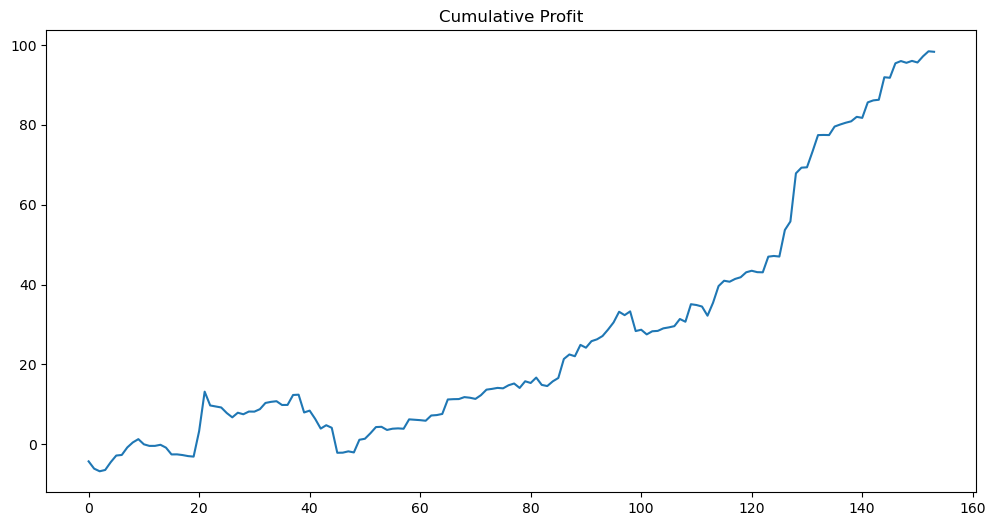

In [51]:
lastprofit=third_trade
#print(lastprofit)
# number of trades 
print("Number of trades: ", len(lastprofit))
#profitable trades 
print("Number of profitable trades: ", len([p for p in lastprofit if p > 0]))
#unprofitable trades
print("Number of unprofitable trades: ", len([p for p in lastprofit if p < 0]))
#profitable trades percentage
print("Percentage of profitable trades: ", len([p for p in lastprofit if p > 0]) / len(lastprofit))
#unprofitable trades percentage
print("Percentage of unprofitable trades: ", len([p for p in lastprofit if p < 0]) / len(lastprofit))
#cumulative profit[PnL] 
print("Cumulative profit: ", sum(lastprofit))
#annualized mean return 
print("Annualized mean return: ", np.mean(lastprofit) * 252)
#annualized standard deviation of return
print("Annualized standard deviation of return: ", np.std(lastprofit) * np.sqrt(252))
#annualized sharpe ratio
print("Annualized sharpe ratio: ", np.mean(lastprofit) / np.std(lastprofit) * np.sqrt(252))
#max drawdown
print("Max drawdown: ", max(lastprofit))
#Plot the cumulative profit
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(lastprofit))
plt.title("Cumulative Profit")
plt.show()


#### if the spread is higher than the upper limited, which means shot Pep and buy KO.


#### if the spread is lower than the lower limited , which means buy Pep and shot KO.

# Second version ratio based paris trading

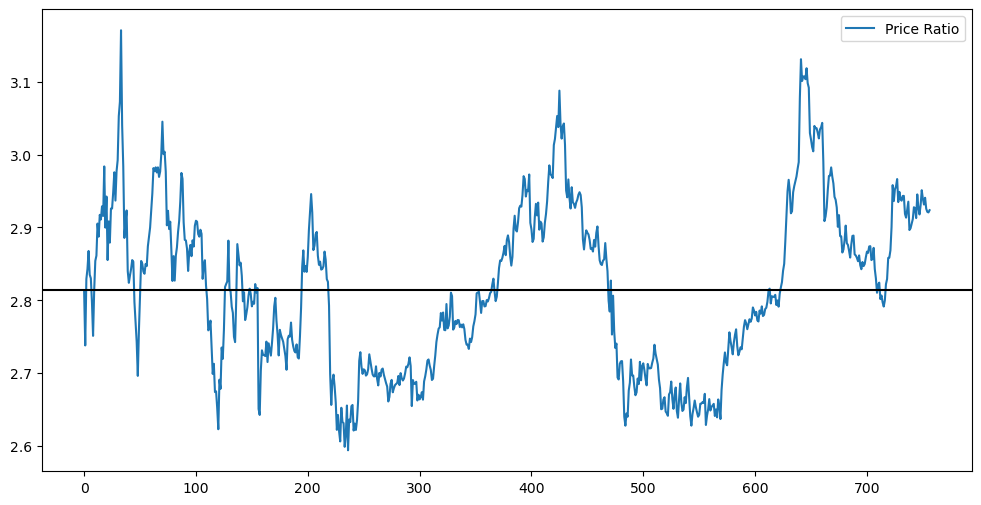

In [52]:
S1= x
S2= y

ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

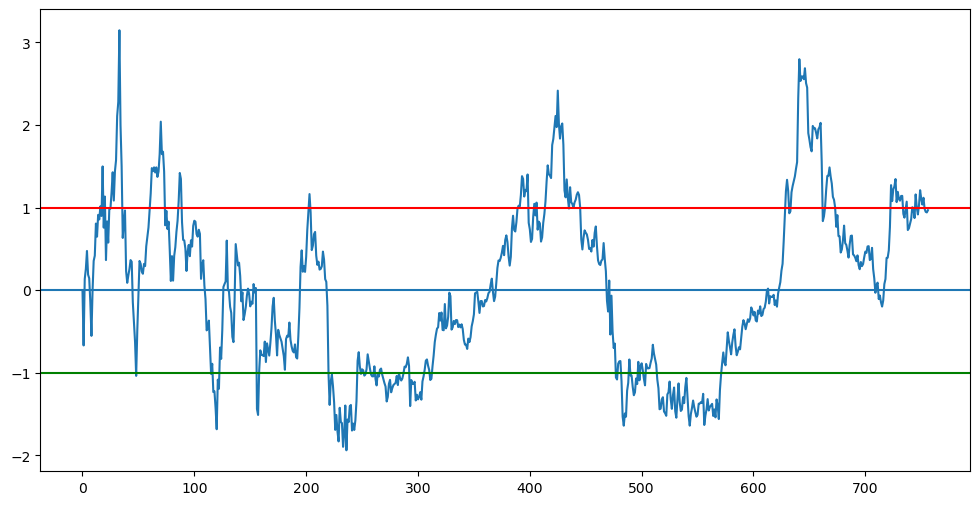

In [53]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [54]:
ratios = PEP_LR/ KO_LR
print(len(ratios) * .70 ) 

# PEP_LR = stocks['PEP'].copy()
# KO_LR = stocks['KO'].copy()

529.9


In [55]:
train = ratios[:541]
test = ratios[527:]

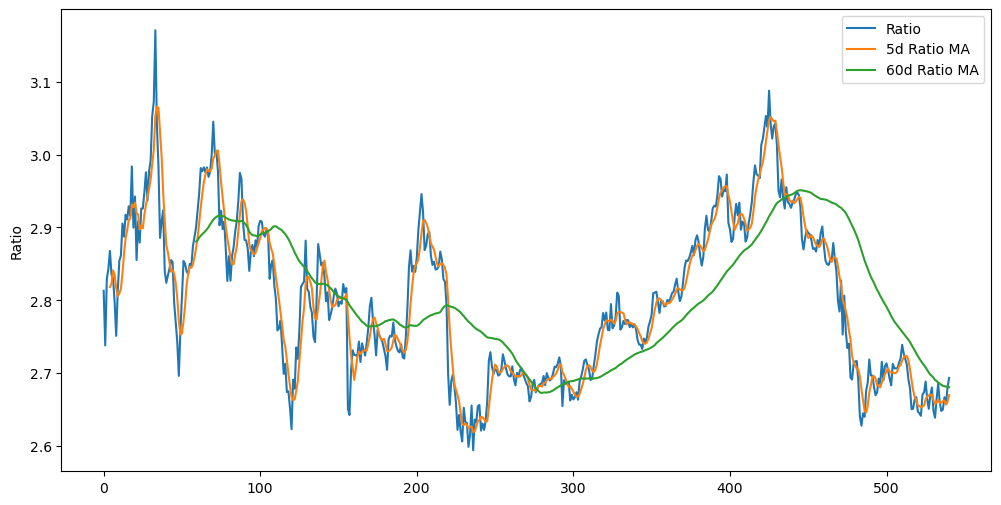

In [56]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

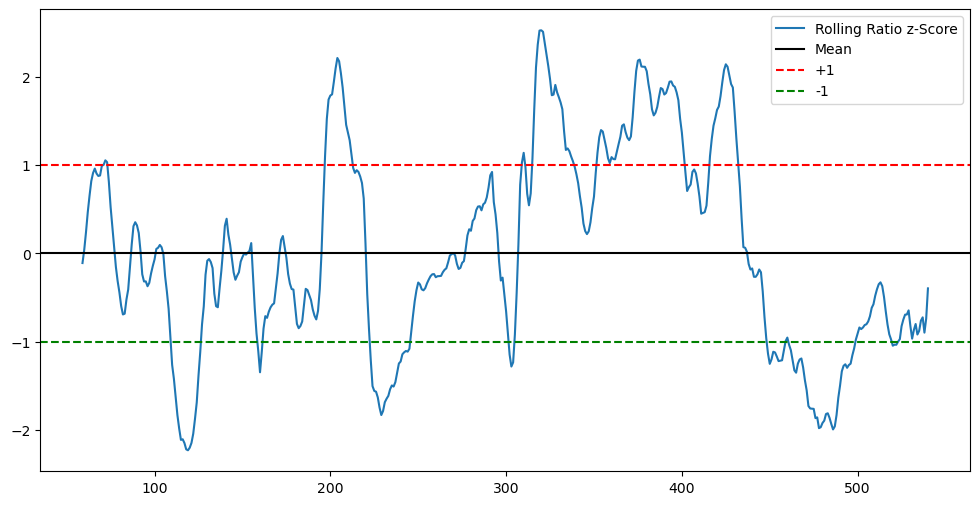

In [57]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

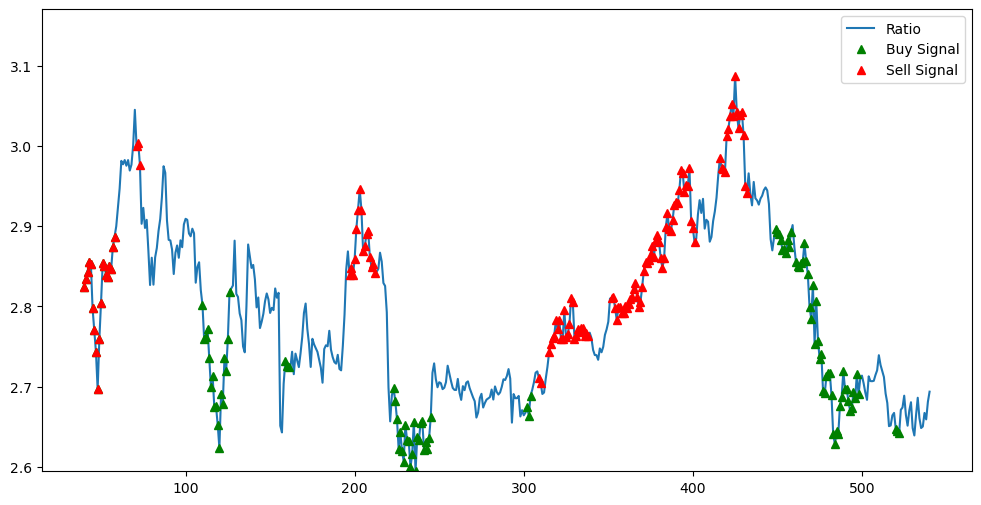

In [58]:
plt.figure(figsize=(12,6))

train[40:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[40:].plot(color='g', linestyle='None', marker='^')
sell[40:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


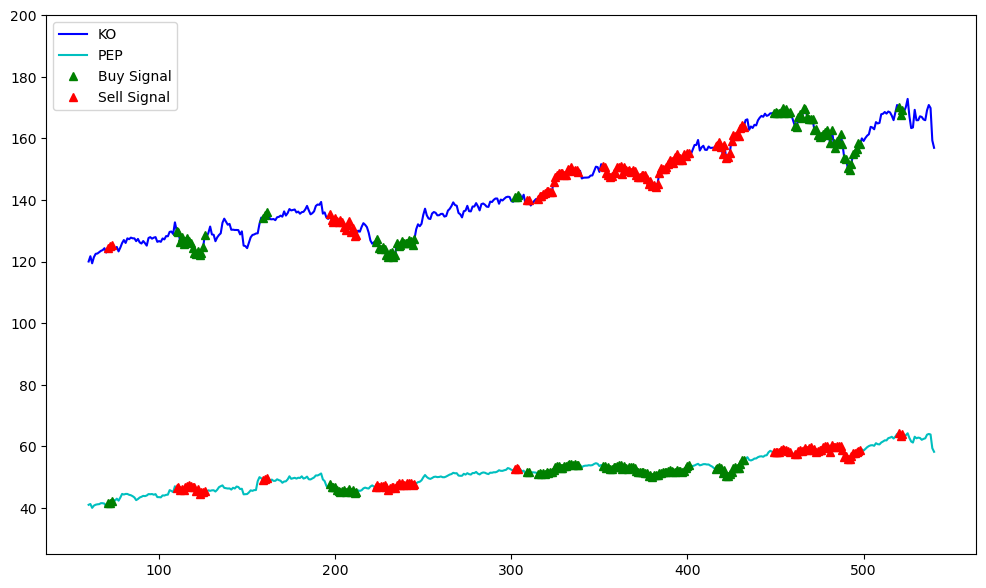

In [59]:
plt.figure(figsize=(12,7))
S1 = stocks['PEP'].iloc[:541]
S2 = stocks['KO'].iloc[:541]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(25, 200)

plt.legend(['KO', 'PEP', 'Buy Signal', 'Sell Signal'])
plt.show()

This trading strategy aims to make money by taking advantage of the differences in prices between two stocks. Specifically, the strategy looks for cases where the price ratio between the two stocks deviates from its historical mean by a significant amount, as measured by the z-score. When this happens, the strategy takes a position by either buying one stock and shorting the other, or vice versa.

For example, if the z-score is less than -1, the strategy will sell short one stock (i.e., bet that its price will go down) and buy the other stock (i.e., bet that its price will go up). By doing this, the strategy is taking advantage of the expectation that the prices of the two stocks will eventually converge back to their historical mean, resulting in a profit.

Similarly, if the z-score is greater than 1, the strategy will take the opposite position by buying one stock and shorting the other. Again, the goal is to profit from the expectation that the prices of the two stocks will eventually converge back to their historical mean.

The strategy also has a mechanism to clear positions and exit the market when the z-score is within a certain range (between -.5 and .5), indicating that the difference in prices between the two stocks is not significant enough to warrant holding any positions.

Overall, the strategy is based on the idea that the prices of two related stocks should move in a somewhat predictable manner relative to each other over time, and that deviations from this pattern can create opportunities for profitable trades.

In [60]:
def trade(stock_prices1, stock_prices2, ma_window1, ma_window2):
    """
    A simple trading strategy that buys and sells two stocks based on their ratio.
    If the ratio is above a certain threshold, the algorithm buys the ratio, and if it is
    below a certain threshold, the algorithm sells short the ratio.
    
    Parameters:
    stock_prices1 (pandas.Series): Prices of stock 1
    stock_prices2 (pandas.Series): Prices of stock 2
    ma_window1 (int): Window size for computing the first moving average
    ma_window2 (int): Window size for computing the second moving average and standard deviation
    
    Returns:
    float: The final balance of the trading account
    """
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (ma_window1 == 0) or (ma_window2 == 0):
        return 0
    
    # Compute the ratio of stock_prices1 to stock_prices2
    stock_prices1.reset_index(drop=True, inplace=True)
    stock_prices2.reset_index(drop=True, inplace=True)

    ratios = stock_prices1 / stock_prices2
    
    # Compute the moving averages and standard deviation of the ratio
    ma1 = ratios.rolling(window=ma_window1, center=False).mean()
    ma2 = ratios.rolling(window=ma_window2, center=False).mean()
    std = ratios.rolling(window=ma_window2, center=False).std()
    
    # Compute the z-score of the ratio based on the moving averages and standard deviation
    z_score = (ma1 - ma2) / std
    
    # Start with no money and no positions
    account_balance = 0
    position_stock1 = 0
    position_stock2 = 0
    profits = []
    
    # Simulate trading
    for i in range(len(ratios)):
        
        # Sell short if the z-score is less than -1
        if z_score[i] < -1:
            account_balance += stock_prices1[i] - stock_prices2[i] * ratios[i]  # update account balance
            profits.append(account_balance)
            position_stock1 -= 1  # sell short stock 1
            position_stock2 += ratios[i]  # buy stock 2
        # Buy long if the z-score is greater than 1
        elif z_score[i] > 1:
            account_balance -= stock_prices1[i] - stock_prices2[i] * ratios[i]  # update account balance
            profits.append(account_balance)
            position_stock1 += 1  # buy stock 1
            position_stock2 -= ratios[i]  # sell stock 2
        # Clear positions if the z-score is between -.75 and .75
        elif abs(z_score[i]) < 0.75:
            account_balance += stock_prices1[i] * position_stock1 + stock_prices2[i] * position_stock2  # update account balance
            profits.append(account_balance)
            position_stock1 = 0  # clear positions in stock 1
            position_stock2 = 0  # clear positions in stock 2
            
    return profits


In [61]:
# print(stocks['PEP'].size)
# print(stocks['KO'].size)
#print(stocks['PEP'].iloc[:541].size)
# print(stocks['KO'].iloc[:541].size)

# print(stocks['PEP'].iloc[541:].size)
# print(stocks['KO'].iloc[541:].size)

In [62]:
# test_PEP= stocks['PEP'].iloc[541:]
# test_KO= stocks['KO'].iloc[541:]
# print(test_PEP)
# print(test_KO)

In [63]:
#trade(stocks['KO'].iloc[541:], stocks['PEP'].iloc[541:], 60, 5)
profits= trade(test_KO, test_PEP, 60, 20)


NameError: name 'test_KO' is not defined

Number of trades:  146
Number of profitable trades:  58
Number of unprofitable trades:  76
Percentage of profitable trades:  0.3972602739726027
Percentage of unprofitable trades:  0.5205479452054794
Cumulative profit:  196.40564428828264
Annualized mean return:  339.0015230181309
Annualized standard deviation of return:  423.7614520504209
Annualized sharpe ratio:  0.7999819742400617
Max drawdown:  50.0855897327492


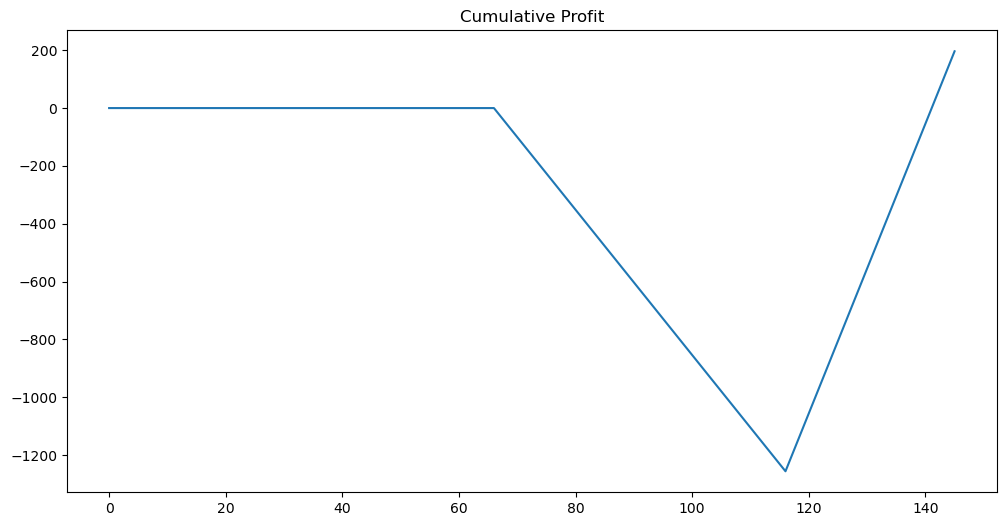

In [ ]:
# number of trades 
print("Number of trades: ", len(profits))
#profitable trades 
print("Number of profitable trades: ", len([p for p in profits if p > 0]))
#unprofitable trades
print("Number of unprofitable trades: ", len([p for p in profits if p < 0]))
#profitable trades percentage
print("Percentage of profitable trades: ", len([p for p in profits if p > 0]) / len(profits))
#unprofitable trades percentage
print("Percentage of unprofitable trades: ", len([p for p in profits if p < 0]) / len(profits))
#cumulative profit[PnL] 
print("Cumulative profit: ", sum(profits))
#annualized mean return 
print("Annualized mean return: ", np.mean(profits) * 252)
#annualized standard deviation of return
print("Annualized standard deviation of return: ", np.std(profits) * np.sqrt(252))
#annualized sharpe ratio
print("Annualized sharpe ratio: ", np.mean(profits) / np.std(profits) * np.sqrt(252))
#max drawdown
print("Max drawdown: ", max(profits))
#Plot the cumulative profit
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(profits))
plt.title("Cumulative Profit")
plt.show()


In [ ]:
profits =trade(stocks['KO'].iloc[:541], stocks['PEP'].iloc[:541], 60, 20)

Number of trades:  411
Number of profitable trades:  318
Number of unprofitable trades:  92
Percentage of profitable trades:  0.7737226277372263
Percentage of unprofitable trades:  0.22384428223844283
Cumulative profit:  8503.742733981713
Annualized mean return:  5213.973647112782
Annualized standard deviation of return:  1051.288698294728
Annualized sharpe ratio:  4.95960211079055
Max drawdown:  80.5950241121939


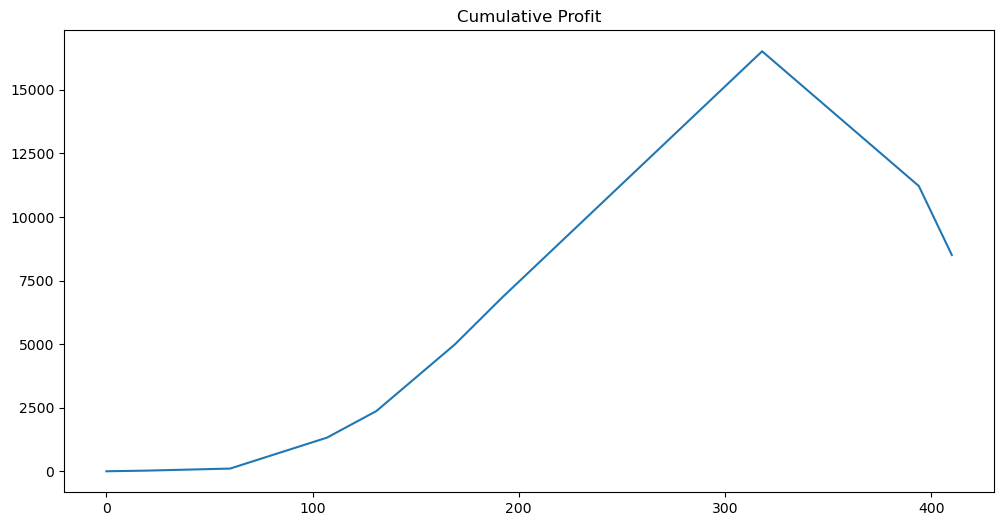

In [ ]:
# number of trades 
print("Number of trades: ", len(profits))
#profitable trades 
print("Number of profitable trades: ", len([p for p in profits if p > 0]))
#unprofitable trades
print("Number of unprofitable trades: ", len([p for p in profits if p < 0]))
#profitable trades percentage
print("Percentage of profitable trades: ", len([p for p in profits if p > 0]) / len(profits))
#unprofitable trades percentage
print("Percentage of unprofitable trades: ", len([p for p in profits if p < 0]) / len(profits))
#cumulative profit[PnL] 
print("Cumulative profit: ", sum(profits))
#annualized mean return 
print("Annualized mean return: ", np.mean(profits) * 252)
#annualized standard deviation of return
print("Annualized standard deviation of return: ", np.std(profits) * np.sqrt(252))
#annualized sharpe ratio
print("Annualized sharpe ratio: ", np.mean(profits) / np.std(profits) * np.sqrt(252))
#max drawdown
print("Max drawdown: ", max(profits))
#Plot the cumulative profit
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(profits))
plt.title("Cumulative Profit")
plt.show()


In [ ]:
# # plot = plt.figure(figsize=(20, 20))
# # plt.plot(buy)
# print(buy.shape)
# print(buy)
# print(sell.shape)
# print(sell)

                      Strategy  Number of Trades  Profitable Trades  \
0            Linear Regression               172                100   
1         Moving Average Ratio               146                 58   
2  Linear Regression with LSTM               100                 45   

   Unprofitable Trades  Profitable Trades %  Unprofitable Trades %  \
0                   72             0.581395               0.418605   
1                   76             0.397260               0.520548   
2                   55             0.450000               0.550000   

   Cumulative Profit  Annualized Mean Return  Annualized Std Dev  \
0          75.536399              110.669608           33.064249   
1         196.405644              339.001523          423.761452   
2          20.627666               51.981718           40.258088   

   Annualized Sharpe Ratio  Max Drawdown  
0                 3.347108     12.070422  
1                 0.799982     50.085590  
2                 1.291212     1

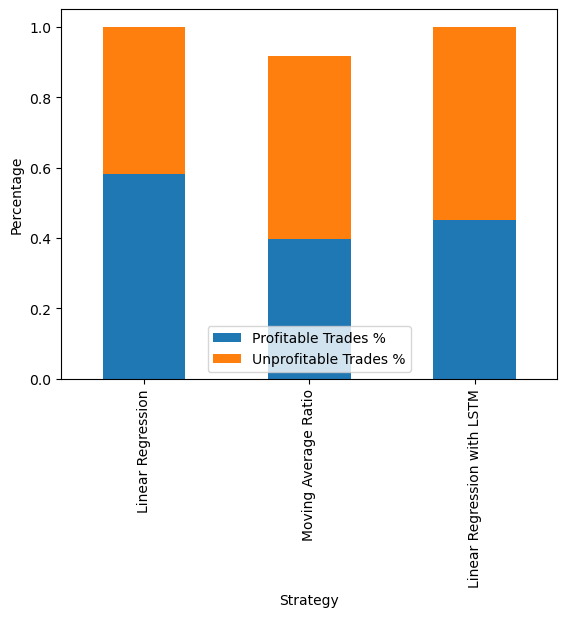

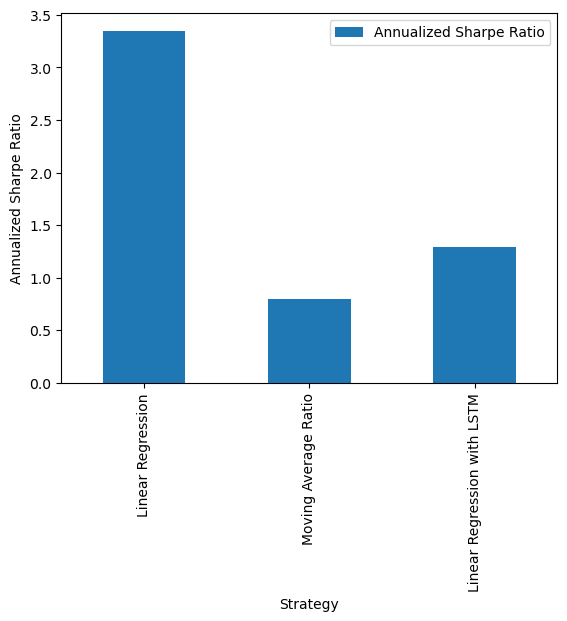

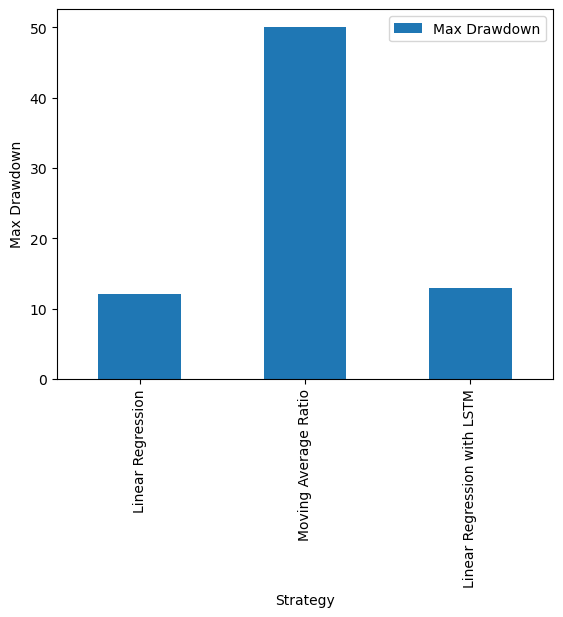

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary containing the data
data = {
    'Strategy': ['Linear Regression', 'Moving Average Ratio', 'Linear Regression with LSTM'],
    'Number of Trades': [172, 146, 100],
    'Profitable Trades': [100, 58, 45],
    'Unprofitable Trades': [72, 76, 55],
    'Profitable Trades %': [0.5813953488372093, 0.3972602739726027, 0.45],
    'Unprofitable Trades %': [0.4186046511627907, 0.5205479452054794, 0.55],
    'Cumulative Profit': [75.53639900000006, 196.40564428828264, 20.62766599999989],
    'Annualized Mean Return': [110.6696078372094, 339.0015230181309, 51.98171831999973],
    'Annualized Std Dev': [33.06424886553786, 423.7614520504209, 40.25808787486133],
    'Annualized Sharpe Ratio': [3.3471078773713776, 0.7999819742400617, 1.2912118052298027],
    'Max Drawdown': [12.07042199999998, 50.0855897327492, 12.932060000000007],
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Plot a bar chart to visualize the percentage of profitable and unprofitable trades for each strategy
ax = df[['Strategy', 'Profitable Trades %', 'Unprofitable Trades %']].plot.bar(x='Strategy', stacked=True)
ax.set_ylabel('Percentage')
plt.show()

# Plot a bar chart to visualize the annualized Sharpe ratio for each strategy
ax = df[['Strategy', 'Annualized Sharpe Ratio']].plot.bar(x='Strategy')
ax.set_ylabel('Annualized Sharpe Ratio')
plt.show()

# Plot a bar chart to visualize the max drawdown for each strategy
ax = df[['Strategy', 'Max Drawdown']].plot.bar(x='Strategy')
ax.set_ylabel('Max Drawdown')
plt.show()
